# 2.1. Load and Process Dataset

In [ ]:
# Install the required libraries
!pip install torch torchvision datasets transformers

import os
import torch
import torchvision
import torchvision.transforms as transforms

# Define the transformations
upscale_transform = transforms.Resize((224, 224), interpolation=transforms.InterpolationMode.BILINEAR)

# Download and load the CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=upscale_transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=upscale_transform, download=True)

# Specify the new root directory for the resized dataset
new_root = './resized_data'

# Create the new directory if it doesn't exist
if not os.path.exists(new_root):
    os.makedirs(new_root)

# Save the resized dataset in the new root directory
torch.save(train_dataset, os.path.join(new_root, 'train_dataset.pth'))
torch.save(test_dataset, os.path.join(new_root, 'test_dataset.pth'))


In [ ]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

data_transforms_train = transforms.Compose(
    [
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std),
    ]
)
data_transforms_test = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std),
    ]
)

train_dataset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=data_transforms_train
)

test_dataset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=data_transforms_test
)

class_names = train_dataset.classes

# 2.2. CNN

100%|██████████| 170498071/170498071 [00:12<00:00, 13199871.29it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:08<00:00, 69.5MB/s]


Epoch 1/20: Train Loss: 0.0114, Train Acc: 0.7556, Val Loss: 0.0076, Val Acc: 0.8388, LR: 0.00010000
Epoch 2/20: Train Loss: 0.0048, Train Acc: 0.8969, Val Loss: 0.0047, Val Acc: 0.9004, LR: 0.00010000
Epoch 00003: reducing learning rate of group 0 to 6.0000e-05.
Epoch 3/20: Train Loss: 0.0036, Train Acc: 0.9231, Val Loss: 0.0041, Val Acc: 0.9128, LR: 0.00006000
Epoch 4/20: Train Loss: 0.0019, Train Acc: 0.9587, Val Loss: 0.0040, Val Acc: 0.9226, LR: 0.00006000
Epoch 00005: reducing learning rate of group 0 to 3.6000e-05.
Epoch 5/20: Train Loss: 0.0015, Train Acc: 0.9675, Val Loss: 0.0043, Val Acc: 0.9132, LR: 0.00003600
Epoch 6/20: Train Loss: 0.0008, Train Acc: 0.9829, Val Loss: 0.0033, Val Acc: 0.9401, LR: 0.00003600
Epoch 00007: reducing learning rate of group 0 to 2.1600e-05.
Epoch 7/20: Train Loss: 0.0006, Train Acc: 0.9875, Val Loss: 0.0033, Val Acc: 0.9425, LR: 0.00002160
Epoch 8/20: Train Loss: 0.0003, Train Acc: 0.9937, Val Loss: 0.0037, Val Acc: 0.9449, LR: 0.00002160
Epoch 

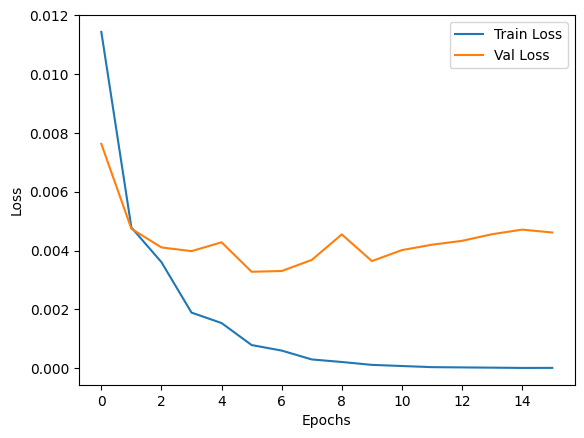

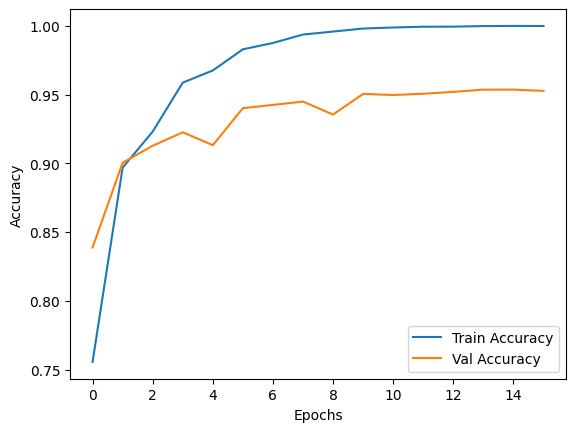

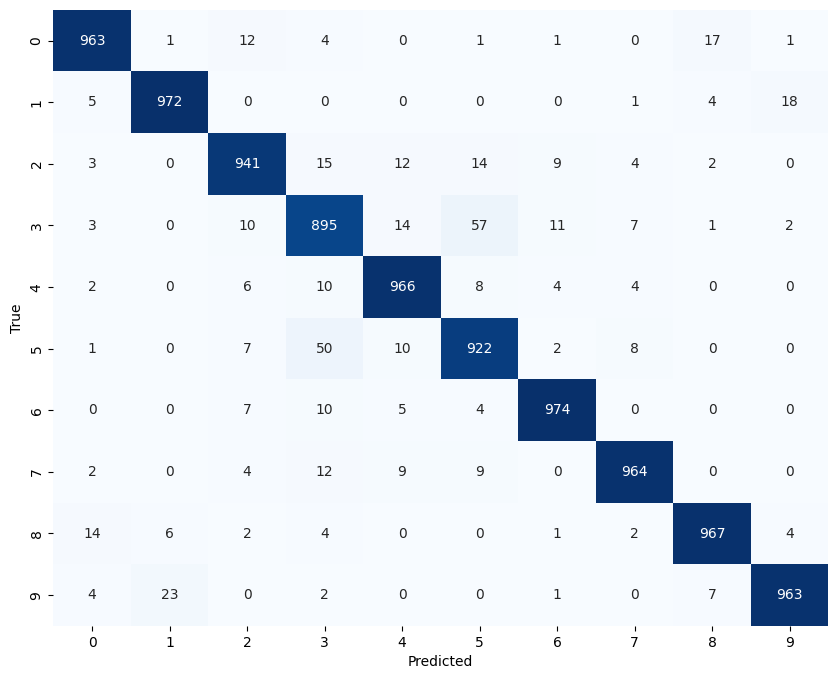

Class 0: F1-Score: 0.9644, Recall: 0.9630, Precision: 0.9659
Class 1: F1-Score: 0.9710, Recall: 0.9720, Precision: 0.9701
Class 2: F1-Score: 0.9462, Recall: 0.9410, Precision: 0.9515
Class 3: F1-Score: 0.8941, Recall: 0.8950, Precision: 0.8932
Class 4: F1-Score: 0.9583, Recall: 0.9660, Precision: 0.9508
Class 5: F1-Score: 0.9151, Recall: 0.9220, Precision: 0.9084
Class 6: F1-Score: 0.9725, Recall: 0.9740, Precision: 0.9711
Class 7: F1-Score: 0.9688, Recall: 0.9640, Precision: 0.9737
Class 8: F1-Score: 0.9680, Recall: 0.9670, Precision: 0.9689
Class 9: F1-Score: 0.9688, Recall: 0.9630, Precision: 0.9747
Overall Accuracy: 0.9527


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score
import warnings
warnings.filterwarnings('ignore')

# Define the transformations
upscale_transform = transforms.Compose([
    transforms.Resize((224, 224), interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()  # Add this line to convert images to tensors
])

# Download and load the CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=upscale_transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=upscale_transform, download=True)

# Define the dataloaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load the pre-trained VGG-19 model
model = models.vgg19(pretrained=True)

# Unfreeze layers starting from 'block5_conv1'
unfreeze_from_layer = 'block5_conv1'
unfreeze = False

for name, param in model.named_parameters():
    if unfreeze:
        param.requires_grad = True
    if name == unfreeze_from_layer:
        unfreeze = True

# Fine-tune the model
criterion = torch.nn.CrossEntropyLoss()
initial_lr = 0.0001
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=initial_lr)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 20
lr_factor = 0.6
lr_patience = 1
min_lr = 0.0000001

train_losses = []
train_accs = []
val_losses = []
val_accs = []
lr_values = []

best_val_acc = 0.0
stop_after_epochs = 2
epochs_without_improvement = 0
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=lr_factor, patience=lr_patience,
                                                           min_lr=min_lr, verbose=True)

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_acc = 0.0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_acc += (predicted == labels).sum().item()

    train_loss /= len(train_loader.dataset)
    train_acc /= len(train_loader.dataset)

    train_losses.append(train_loss)
    train_accs.append(train_acc)

    model.eval()
    val_loss = 0.0
    val_acc = 0.0
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_acc += (predicted == labels).sum().item()

            y_true.extend(labels.tolist())
            y_pred.extend(predicted.tolist())

    val_loss /= len(test_loader.dataset)
    val_acc /= len(test_loader.dataset)

    val_losses.append(val_loss)
    val_accs.append(val_acc)

    lr_values.append(optimizer.param_groups[0]['lr'])
    lr_scheduler.step(val_acc)

    print(f"Epoch {epoch + 1}/{num_epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, LR: {optimizer.param_groups[0]['lr']:.8f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= stop_after_epochs:
            print(f"Validation accuracy has not improved for {stop_after_epochs} epochs. "
                  f"Stopping training...")
            break

# Plot val/train accuracy and loss
plt.figure()
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('lossplot22.pdf')
plt.show()

plt.figure()
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracyplot22.pdf')
plt.show()

# Calculate and plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusionmatrix22.pdf')
plt.show()

# Print F1-score, recall, accuracy, and precision for all classes
f1_scores = f1_score(y_true, y_pred, average=None)
recall_scores = recall_score(y_true, y_pred, average=None)
accuracy = accuracy_score(y_true, y_pred)
precision_scores = precision_score(y_true, y_pred, average=None)

for i in range(len(f1_scores)):
    print(f"Class {i}: F1-Score: {f1_scores[i]:.4f}, Recall: {recall_scores[i]:.4f}, "
          f"Precision: {precision_scores[i]:.4f}")

print(f"Overall Accuracy: {accuracy:.4f}")


# 2.3. Transformers

In [ ]:
!pip install timm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.1 MB/s eta 0:00:00


Files already downloaded and verified
Files already downloaded and verified


Epoch 1/20: Train Loss: 0.0035, Train Acc: 0.9532, Val Loss: 0.0019, Val Acc: 0.9649
Epoch 2/20: Train Loss: 0.0010, Train Acc: 0.9803, Val Loss: 0.0018, Val Acc: 0.9639
Epoch 3/20: Train Loss: 0.0007, Train Acc: 0.9862, Val Loss: 0.0023, Val Acc: 0.9582
Epoch 4/20: Train Loss: 0.0005, Train Acc: 0.9901, Val Loss: 0.0018, Val Acc: 0.9670
Epoch 5/20: Train Loss: 0.0005, Train Acc: 0.9908, Val Loss: 0.0029, Val Acc: 0.9544
Epoch 6/20: Train Loss: 0.0005, Train Acc: 0.9914, Val Loss: 0.0019, Val Acc: 0.9652
Epoch 7/20: Train Loss: 0.0003, Train Acc: 0.9930, Val Loss: 0.0019, Val Acc: 0.9664
Epoch 8/20: Train Loss: 0.0003, Train Acc: 0.9937, Val Loss: 0.0025, Val Acc: 0.9593
Epoch 9/20: Train Loss: 0.0003, Train Acc: 0.9935, Val Loss: 0.0019, Val Acc: 0.9653
Epoch 10/20: Train Loss: 0.0001, Train Acc: 0.9979, Val Loss: 0.0017, Val Acc: 0.9735
Epoch 11/20: Train Loss: 0.0001, Train Acc: 0.9983, Val Loss: 0.0022, Val Acc: 0.9667
Epoch 12/20: Train Loss: 0.0001, Train Acc: 0.9978, Val Loss: 0

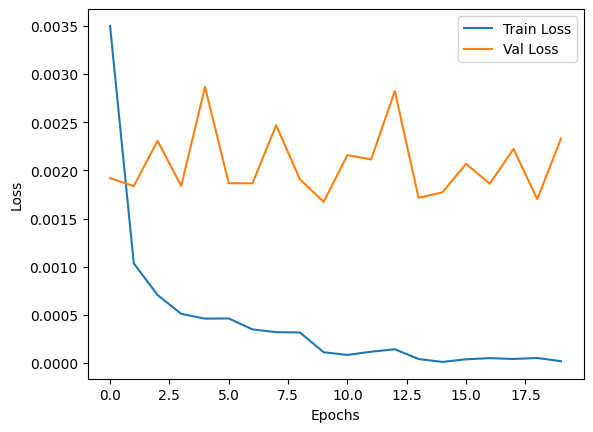

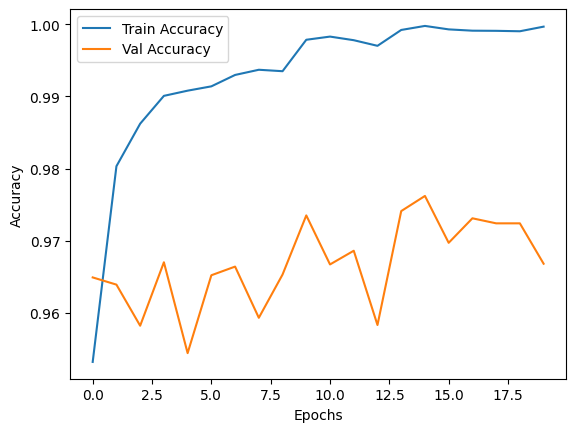

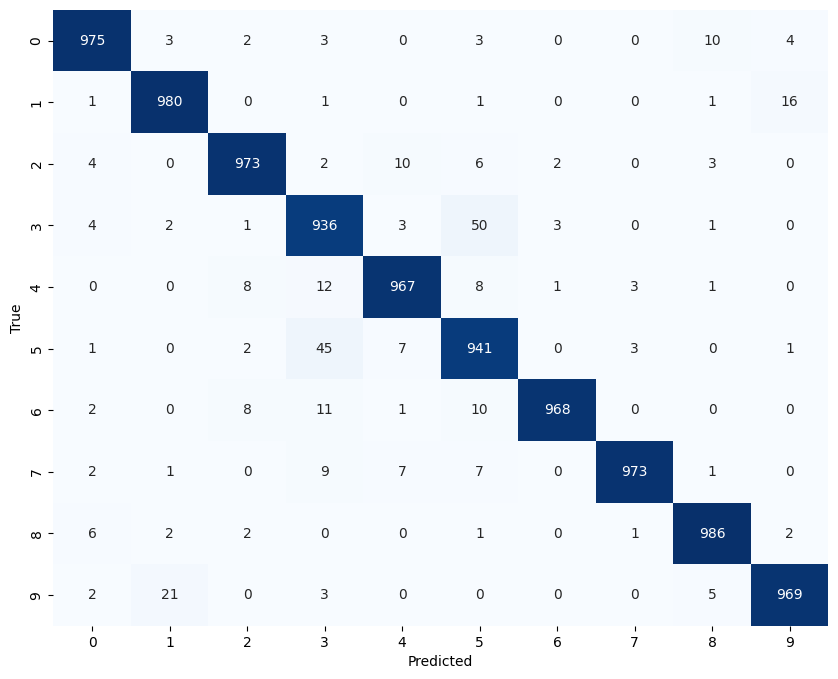

Class 0: F1-Score: 0.9765, Recall: 0.9750, Precision: 0.9779
Class 1: F1-Score: 0.9756, Recall: 0.9800, Precision: 0.9713
Class 2: F1-Score: 0.9749, Recall: 0.9730, Precision: 0.9769
Class 3: F1-Score: 0.9258, Recall: 0.9360, Precision: 0.9159
Class 4: F1-Score: 0.9694, Recall: 0.9670, Precision: 0.9719
Class 5: F1-Score: 0.9285, Recall: 0.9410, Precision: 0.9163
Class 6: F1-Score: 0.9807, Recall: 0.9680, Precision: 0.9938
Class 7: F1-Score: 0.9828, Recall: 0.9730, Precision: 0.9929
Class 8: F1-Score: 0.9821, Recall: 0.9860, Precision: 0.9782
Class 9: F1-Score: 0.9729, Recall: 0.9690, Precision: 0.9768
Overall Accuracy: 0.9668


In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score
import timm

# Define the transformations
upscale_transform = transforms.Compose([
    transforms.Resize((224, 224), interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()  # Convert images to tensors
])

# Download and load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=upscale_transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=upscale_transform, download=True)

# Define the dataloaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load the pre-trained ViT-L32 model
model = timm.create_model('vit_large_patch32_224', pretrained=True, num_classes=10)

# Unfreeze layers starting from 'Transformer/encoderblock 23'
unfreeze_from_layer = 'Transformer/encoderblock_23'
unfreeze = False

for name, param in model.named_parameters():
    if unfreeze:
        param.requires_grad = True
    if name.startswith(unfreeze_from_layer):
        unfreeze = True

# Fine-tune the model
criterion = torch.nn.CrossEntropyLoss()
learning_rate = 0.0001
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.6, patience=1, min_lr=1e-7)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 20
stop_after_epochs = 2  # Stop training after 5 epochs without improvement
best_val_acc = 0.0
epochs_without_improvement = 0

train_losses = []
train_accs = []
val_losses = []
val_accs = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_acc = 0.0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_acc += (predicted == labels).sum().item()

    train_loss /= len(train_loader.dataset)
    train_acc /= len(train_loader.dataset)

    train_losses.append(train_loss)
    train_accs.append(train_acc)

    model.eval()
    val_loss = 0.0
    val_acc = 0.0
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_acc += (predicted == labels).sum().item()

            y_true.extend(labels.tolist())
            y_pred.extend(predicted.tolist())

    val_loss /= len(test_loader.dataset)
    val_acc /= len(test_loader.dataset)

    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch + 1}/{num_epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Check if validation accuracy has improved
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    # Reduce learning rate if no improvement for a certain number of epochs
    if epochs_without_improvement >= stop_after_epochs:
        lr_scheduler.step(val_loss)
        if optimizer.param_groups[0]['lr'] < 1e-7:
            print("Training stopped as learning rate reached the minimum value.")
            break

# Plot val/train accuracy and loss
plt.figure()
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('lossplot.pdf')
plt.show()

plt.figure()
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracyplot.pdf')
plt.show()

# Calculate and plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusionmatrix.pdf')
plt.show()

# Print F1-score, recall, accuracy, and precision for all classes
f1_scores = f1_score(y_true, y_pred, average=None)
recall_scores = recall_score(y_true, y_pred, average=None)
accuracy = accuracy_score(y_true, y_pred)
precision_scores = precision_score(y_true, y_pred, average=None)

for i in range(len(f1_scores)):
    print(f"Class {i}: F1-Score: {f1_scores[i]:.4f}, Recall: {recall_scores[i]:.4f}, "
          f"Precision: {precision_scores[i]:.4f}")

print(f"Overall Accuracy: {accuracy:.4f}")


Files already downloaded and verified
Files already downloaded and verified
Epoch 1/20: Train Loss: 0.0226, Train Acc: 0.8430, Val Loss: 0.0141, Val Acc: 0.8965
Epoch 2/20: Train Loss: 0.0106, Train Acc: 0.9060, Val Loss: 0.0086, Val Acc: 0.9006
Epoch 3/20: Train Loss: 0.0072, Train Acc: 0.9117, Val Loss: 0.0066, Val Acc: 0.9069
Epoch 4/20: Train Loss: 0.0059, Train Acc: 0.9150, Val Loss: 0.0057, Val Acc: 0.9089
Epoch 5/20: Train Loss: 0.0051, Train Acc: 0.9186, Val Loss: 0.0052, Val Acc: 0.9105
Epoch 6/20: Train Loss: 0.0047, Train Acc: 0.9214, Val Loss: 0.0048, Val Acc: 0.9124
Epoch 7/20: Train Loss: 0.0044, Train Acc: 0.9226, Val Loss: 0.0046, Val Acc: 0.9139
Epoch 8/20: Train Loss: 0.0042, Train Acc: 0.9249, Val Loss: 0.0044, Val Acc: 0.9156
Epoch 9/20: Train Loss: 0.0040, Train Acc: 0.9268, Val Loss: 0.0043, Val Acc: 0.9181
Epoch 10/20: Train Loss: 0.0039, Train Acc: 0.9281, Val Loss: 0.0042, Val Acc: 0.9178
Epoch 11/20: Train Loss: 0.0038, Train Acc: 0.9290, Val Loss: 0.0041, Val

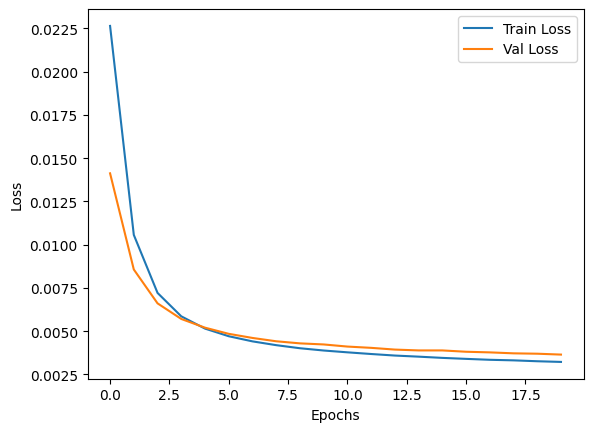

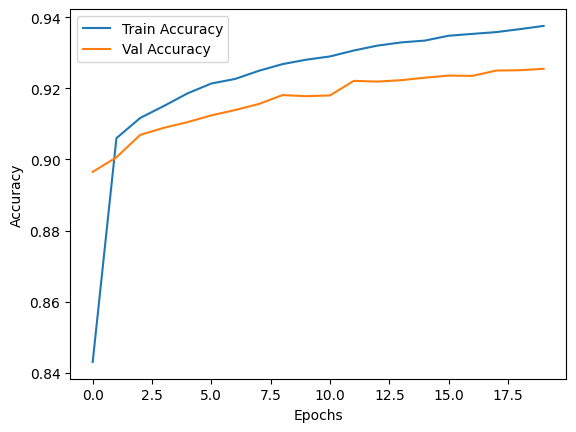

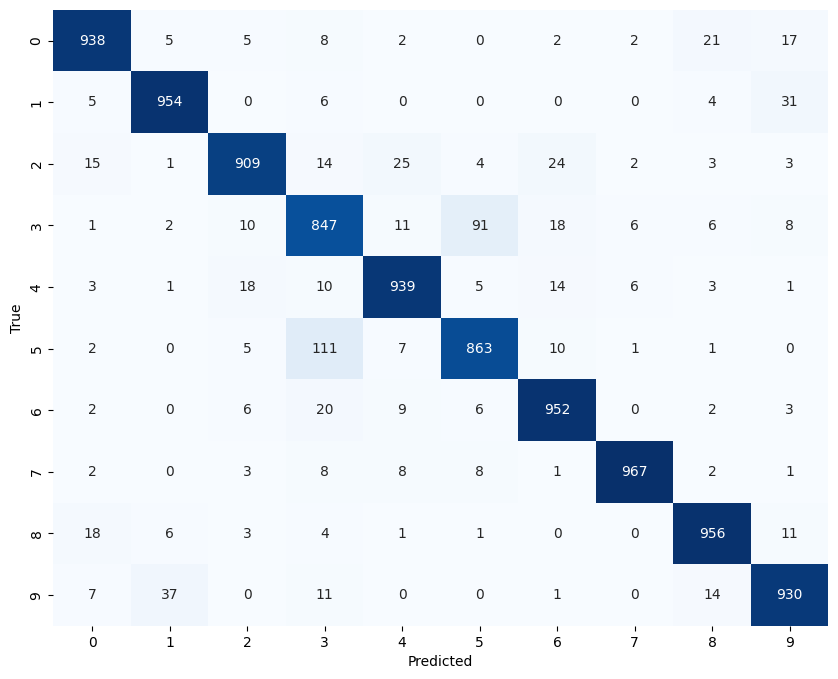

Class 0: F1-Score: 0.9413, Recall: 0.9380, Precision: 0.9446
Class 1: F1-Score: 0.9511, Recall: 0.9540, Precision: 0.9483
Class 2: F1-Score: 0.9280, Recall: 0.9090, Precision: 0.9479
Class 3: F1-Score: 0.8308, Recall: 0.8470, Precision: 0.8152
Class 4: F1-Score: 0.9381, Recall: 0.9390, Precision: 0.9371
Class 5: F1-Score: 0.8726, Recall: 0.8630, Precision: 0.8824
Class 6: F1-Score: 0.9416, Recall: 0.9520, Precision: 0.9315
Class 7: F1-Score: 0.9748, Recall: 0.9670, Precision: 0.9827
Class 8: F1-Score: 0.9503, Recall: 0.9560, Precision: 0.9447
Class 9: F1-Score: 0.9277, Recall: 0.9300, Precision: 0.9254
Overall Accuracy: 0.9255


In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score
import timm

# Define the transformations
upscale_transform = transforms.Compose([
    transforms.Resize((224, 224), interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()  # Convert images to tensors
])

# Download and load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=upscale_transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=upscale_transform, download=True)

# Define the dataloaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load the pre-trained ViT-L32 model
model = timm.create_model('vit_large_patch32_224', pretrained=True, num_classes=10)

# Freeze all layers except the last block of the transformer and the MLP head
for name, param in model.named_parameters():
    if not name.startswith('Transformer/encoderblock_23') and not name.startswith('head'):
        param.requires_grad = False

# Fine-tune the model
criterion = torch.nn.CrossEntropyLoss()
learning_rate = 0.0001
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.6, patience=1, min_lr=1e-7)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 20
stop_after_epochs = 2  # Stop training after 5 epochs without improvement
best_val_acc = 0.0
epochs_without_improvement = 0

train_losses = []
train_accs = []
val_losses = []
val_accs = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_acc = 0.0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_acc += (predicted == labels).sum().item()

    train_loss /= len(train_loader.dataset)
    train_acc /= len(train_loader.dataset)

    train_losses.append(train_loss)
    train_accs.append(train_acc)

    model.eval()
    val_loss = 0.0
    val_acc = 0.0
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_acc += (predicted == labels).sum().item()

            y_true.extend(labels.tolist())
            y_pred.extend(predicted.tolist())

    val_loss /= len(test_loader.dataset)
    val_acc /= len(test_loader.dataset)

    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch + 1}/{num_epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Check if validation accuracy has improved
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    # Reduce learning rate if no improvement for a certain number of epochs
    if epochs_without_improvement >= stop_after_epochs:
        lr_scheduler.step(val_loss)
        if optimizer.param_groups[0]['lr'] < 1e-7:
            print("Training stopped as learning rate reached the minimum value.")
            break

# Plot val/train accuracy and loss
plt.figure()
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('lossplot33.pdf')
plt.show()

plt.figure()
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracyplot33.pdf')
plt.show()

# Calculate and plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusionmatrix33.pdf')
plt.show()

# Print F1-score, recall, accuracy, and precision for all classes
f1_scores = f1_score(y_true, y_pred, average=None)
recall_scores = recall_score(y_true, y_pred, average=None)
accuracy = accuracy_score(y_true, y_pred)
precision_scores = precision_score(y_true, y_pred, average=None)

for i in range(len(f1_scores)):
    print(f"Class {i}: F1-Score: {f1_scores[i]:.4f}, Recall: {recall_scores[i]:.4f}, "
          f"Precision: {precision_scores[i]:.4f}")

print(f"Overall Accuracy: {accuracy:.4f}")


Files already downloaded and verified
Files already downloaded and verified


Epoch 1/20: Train Loss: 0.0083, Train Acc: 0.8799, Val Loss: 0.0027, Val Acc: 0.9576
Epoch 2/20: Train Loss: 0.0020, Train Acc: 0.9667, Val Loss: 0.0018, Val Acc: 0.9665
Epoch 3/20: Train Loss: 0.0013, Train Acc: 0.9779, Val Loss: 0.0016, Val Acc: 0.9699
Epoch 4/20: Train Loss: 0.0009, Train Acc: 0.9840, Val Loss: 0.0014, Val Acc: 0.9718
Epoch 5/20: Train Loss: 0.0007, Train Acc: 0.9888, Val Loss: 0.0013, Val Acc: 0.9743
Epoch 6/20: Train Loss: 0.0005, Train Acc: 0.9929, Val Loss: 0.0013, Val Acc: 0.9737
Epoch 7/20: Train Loss: 0.0004, Train Acc: 0.9950, Val Loss: 0.0013, Val Acc: 0.9739
Epoch 8/20: Train Loss: 0.0003, Train Acc: 0.9966, Val Loss: 0.0014, Val Acc: 0.9725
Epoch 9/20: Train Loss: 0.0002, Train Acc: 0.9982, Val Loss: 0.0014, Val Acc: 0.9752
Epoch 10/20: Train Loss: 0.0001, Train Acc: 0.9986, Val Loss: 0.0014, Val Acc: 0.9750
Epoch 11/20: Train Loss: 0.0001, Train Acc: 0.9993, Val Loss: 0.0014, Val Acc: 0.9753
Epoch 12/20: Train Loss: 0.0001, Train Acc: 0.9990, Val Loss: 0

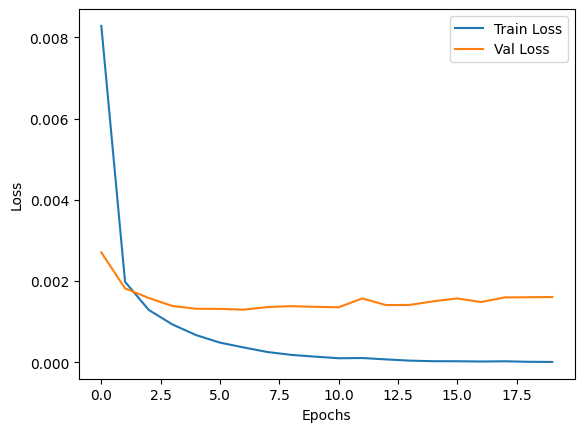

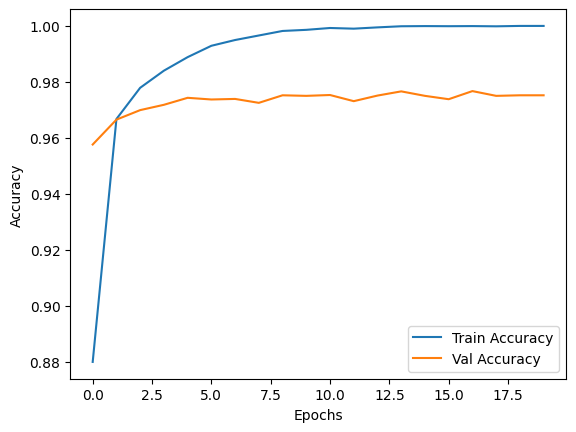

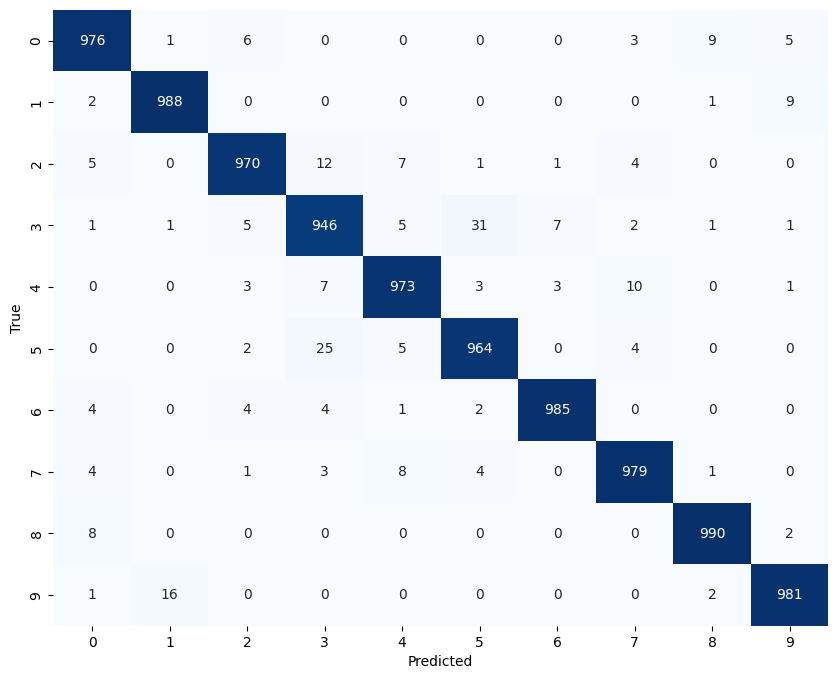

Class 0: F1-Score: 0.9755, Recall: 0.9760, Precision: 0.9750
Class 1: F1-Score: 0.9850, Recall: 0.9880, Precision: 0.9821
Class 2: F1-Score: 0.9744, Recall: 0.9700, Precision: 0.9788
Class 3: F1-Score: 0.9474, Recall: 0.9460, Precision: 0.9488
Class 4: F1-Score: 0.9735, Recall: 0.9730, Precision: 0.9740
Class 5: F1-Score: 0.9616, Recall: 0.9640, Precision: 0.9592
Class 6: F1-Score: 0.9870, Recall: 0.9850, Precision: 0.9890
Class 7: F1-Score: 0.9780, Recall: 0.9790, Precision: 0.9770
Class 8: F1-Score: 0.9880, Recall: 0.9900, Precision: 0.9861
Class 9: F1-Score: 0.9815, Recall: 0.9810, Precision: 0.9820
Overall Accuracy: 0.9752


In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score
import timm

# Define the transformations
upscale_transform = transforms.Compose([
    transforms.Resize((224, 224), interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()  # Convert images to tensors
])

# Download and load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=upscale_transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=upscale_transform, download=True)

# Define the dataloaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load the pre-trained CaiT-S24 model
model = timm.create_model('cait_s24_224', pretrained=True, num_classes=10)

# Freeze all layers except the last block of the transformer and the MLP head
for name, param in model.named_parameters():
    if not name.startswith('blocks.11') and not name.startswith('head'):
        param.requires_grad = False

# Fine-tune the model
criterion = torch.nn.CrossEntropyLoss()
learning_rate = 0.0001
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.6, patience=1, min_lr=1e-7)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 20
stop_after_epochs = 2  # Stop training after 5 epochs without improvement
best_val_acc = 0.0
epochs_without_improvement = 0

train_losses = []
train_accs = []
val_losses = []
val_accs = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_acc = 0.0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_acc += (predicted == labels).sum().item()

    train_loss /= len(train_loader.dataset)
    train_acc /= len(train_loader.dataset)

    train_losses.append(train_loss)
    train_accs.append(train_acc)

    model.eval()
    val_loss = 0.0
    val_acc = 0.0
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_acc += (predicted == labels).sum().item()

            y_true.extend(labels.tolist())
            y_pred.extend(predicted.tolist())

    val_loss /= len(test_loader.dataset)
    val_acc /= len(test_loader.dataset)

    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch + 1}/{num_epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Check if validation accuracy has improved
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    # Reduce learning rate if no improvement for a certain number of epochs
    if epochs_without_improvement >= stop_after_epochs:
        lr_scheduler.step(val_loss)
        if optimizer.param_groups[0]['lr'] < 1e-7:
            print("Training stopped as learning rate reached the minimum value.")
            break

# Plot val/train accuracy and loss
plt.figure()
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('44lossplot.pdf')
plt.show()

plt.figure()
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('44accuracyplot.pdf')
plt.show()

# Calculate and plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('44confusionmatrix.pdf')
plt.show()

# Print F1-score, recall, accuracy, and precision for all classes
f1_scores = f1_score(y_true, y_pred, average=None)
recall_scores = recall_score(y_true, y_pred, average=None)
accuracy = accuracy_score(y_true, y_pred)
precision_scores = precision_score(y_true, y_pred, average=None)

for i in range(len(f1_scores)):
    print(f"Class {i}: F1-Score: {f1_scores[i]:.4f}, Recall: {recall_scores[i]:.4f}, "
          f"Precision: {precision_scores[i]:.4f}")

print(f"Overall Accuracy: {accuracy:.4f}")


Files already downloaded and verified
Files already downloaded and verified
Epoch 1/30: Train Loss: 0.0229, Train Acc: 0.8368, Val Loss: 0.0142, Val Acc: 0.8971
Epoch 2/30: Train Loss: 0.0106, Train Acc: 0.9075, Val Loss: 0.0086, Val Acc: 0.9019
Epoch 3/30: Train Loss: 0.0072, Train Acc: 0.9123, Val Loss: 0.0067, Val Acc: 0.9039
Epoch 4/30: Train Loss: 0.0059, Train Acc: 0.9159, Val Loss: 0.0057, Val Acc: 0.9078
Epoch 5/30: Train Loss: 0.0052, Train Acc: 0.9187, Val Loss: 0.0052, Val Acc: 0.9122
Epoch 6/30: Train Loss: 0.0047, Train Acc: 0.9213, Val Loss: 0.0048, Val Acc: 0.9124
Epoch 7/30: Train Loss: 0.0044, Train Acc: 0.9232, Val Loss: 0.0046, Val Acc: 0.9147
Epoch 8/30: Train Loss: 0.0042, Train Acc: 0.9253, Val Loss: 0.0044, Val Acc: 0.9155
Epoch 9/30: Train Loss: 0.0040, Train Acc: 0.9259, Val Loss: 0.0043, Val Acc: 0.9176
Epoch 10/30: Train Loss: 0.0039, Train Acc: 0.9285, Val Loss: 0.0042, Val Acc: 0.9177
Epoch 11/30: Train Loss: 0.0038, Train Acc: 0.9296, Val Loss: 0.0041, Val

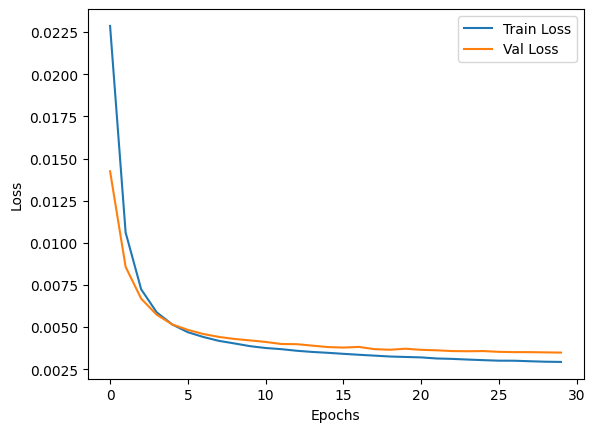

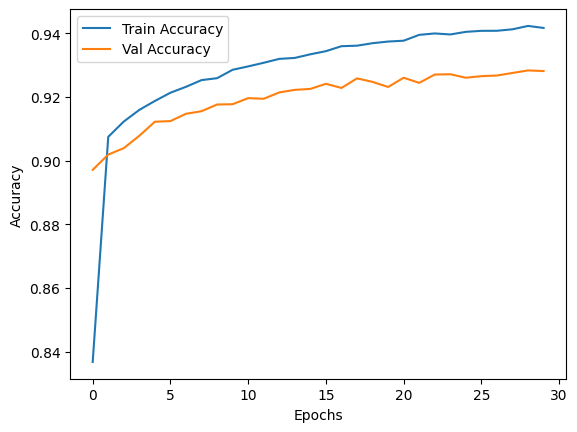

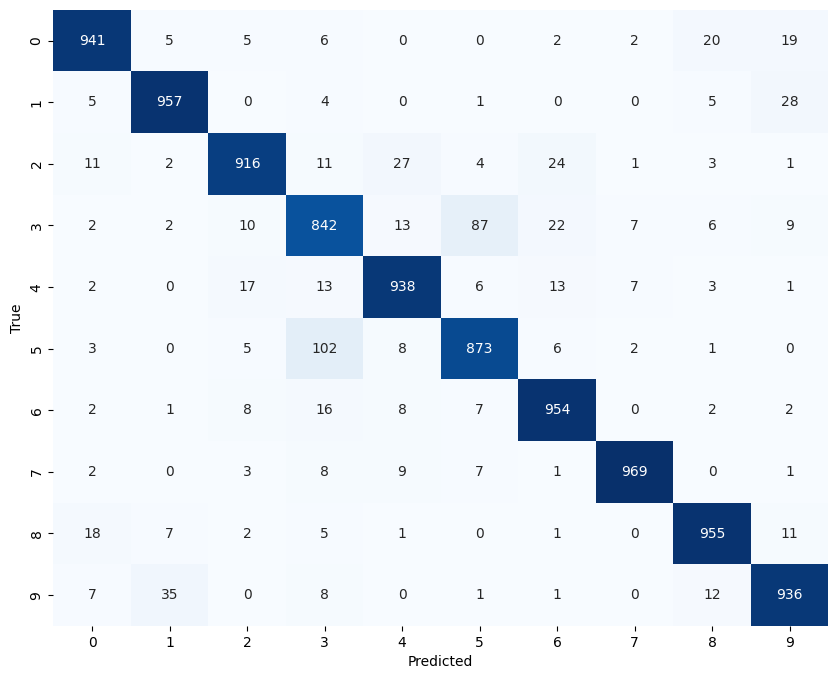

Class 0: F1-Score: 0.9443, Recall: 0.9410, Precision: 0.9476
Class 1: F1-Score: 0.9527, Recall: 0.9570, Precision: 0.9485
Class 2: F1-Score: 0.9318, Recall: 0.9160, Precision: 0.9482
Class 3: F1-Score: 0.8357, Recall: 0.8420, Precision: 0.8296
Class 4: F1-Score: 0.9361, Recall: 0.9380, Precision: 0.9343
Class 5: F1-Score: 0.8792, Recall: 0.8730, Precision: 0.8854
Class 6: F1-Score: 0.9427, Recall: 0.9540, Precision: 0.9316
Class 7: F1-Score: 0.9748, Recall: 0.9690, Precision: 0.9808
Class 8: F1-Score: 0.9517, Recall: 0.9550, Precision: 0.9484
Class 9: F1-Score: 0.9323, Recall: 0.9360, Precision: 0.9286
Overall Accuracy: 0.9281


In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score
import timm

# Define the transformations
upscale_transform = transforms.Compose([
    transforms.Resize((224, 224), interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()  # Convert images to tensors
])

# Download and load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=upscale_transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=upscale_transform, download=True)

# Define the dataloaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load the pre-trained ViT-L32 model
model = timm.create_model('vit_large_patch32_224', pretrained=True, num_classes=10)

# Freeze all layers except the last block of the transformer and the MLP head
for name, param in model.named_parameters():
    if not name.startswith('Transformer/encoderblock_23') and not name.startswith('head'):
        param.requires_grad = False

# Fine-tune the model
criterion = torch.nn.CrossEntropyLoss()
learning_rate = 0.0001
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.6, patience=1, min_lr=1e-7)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 30
stop_after_epochs = 2  # Stop training after 5 epochs without improvement
best_val_acc = 0.0
epochs_without_improvement = 0

train_losses = []
train_accs = []
val_losses = []
val_accs = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_acc = 0.0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_acc += (predicted == labels).sum().item()

    train_loss /= len(train_loader.dataset)
    train_acc /= len(train_loader.dataset)

    train_losses.append(train_loss)
    train_accs.append(train_acc)

    model.eval()
    val_loss = 0.0
    val_acc = 0.0
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_acc += (predicted == labels).sum().item()

            y_true.extend(labels.tolist())
            y_pred.extend(predicted.tolist())

    val_loss /= len(test_loader.dataset)
    val_acc /= len(test_loader.dataset)

    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch + 1}/{num_epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Check if validation accuracy has improved
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    # Reduce learning rate if no improvement for a certain number of epochs
    if epochs_without_improvement >= stop_after_epochs:
        lr_scheduler.step(val_loss)
        if optimizer.param_groups[0]['lr'] < 1e-7:
            print("Training stopped as learning rate reached the minimum value.")
            break

# Plot val/train accuracy and loss
plt.figure()
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('lossplot33.pdf')
plt.show()

plt.figure()
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracyplot33.pdf')
plt.show()

# Calculate and plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusionmatrix33.pdf')
plt.show()

# Print F1-score, recall, accuracy, and precision for all classes
f1_scores = f1_score(y_true, y_pred, average=None)
recall_scores = recall_score(y_true, y_pred, average=None)
accuracy = accuracy_score(y_true, y_pred)
precision_scores = precision_score(y_true, y_pred, average=None)

for i in range(len(f1_scores)):
    print(f"Class {i}: F1-Score: {f1_scores[i]:.4f}, Recall: {recall_scores[i]:.4f}, "
          f"Precision: {precision_scores[i]:.4f}")

print(f"Overall Accuracy: {accuracy:.4f}")


In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score
import timm

# Define the transformations
upscale_transform = transforms.Compose([
    transforms.Resize((224, 224), interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()  # Convert images to tensors
])

# Download and load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=upscale_transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=upscale_transform, download=True)

# Define the dataloaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Fine-tune CaiT-S24 model for classification
model = timm.create_model('cait_s24_224', pretrained=True, num_classes=10)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 10
train_loss = []
train_acc = []
val_loss = []
val_acc = []

for epoch in range(epochs):
    # Training loop
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        running_loss += loss.item()

    train_loss.append(running_loss / len(train_loader))
    train_acc.append(correct / total)

    # Validation loop
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            running_loss += loss.item()

        val_loss.append(running_loss / len(test_loader))
        val_acc.append(correct / total)

    print(f"Epoch [{epoch+1}/{epochs}], "
          f"Train Loss: {train_loss[-1]:.4f}, Train Acc: {train_acc[-1]:.4f}, "
          f"Val Loss: {val_loss[-1]:.4f}, Val Acc: {val_acc[-1]:.4f}")

# Plot loss and accuracy for train/validation
plt.figure()
plt.plot(range(1, epochs+1), train_loss, label='Train Loss')
plt.plot(range(1, epochs+1), val_loss, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_plot.pdf')
plt.close()

plt.figure()
plt.plot(range(1, epochs+1), train_acc, label='Train Acc')
plt.plot(range(1, epochs+1), val_acc, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy_plot.pdf')
plt.close()

# Calculate predictions and metrics
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        predictions.extend(predicted.tolist())
        true_labels.extend(labels.tolist())

# Plot confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.pdf')
plt.close()

# Calculate and print metrics
f1 = f1_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
precision = precision_score(true_labels, predictions, average='weighted')
accuracy = accuracy_score(true_labels, predictions)

print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Accuracy: {accuracy:.4f}")
